- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('Data/world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


Text(0, 0.5, 'Region')

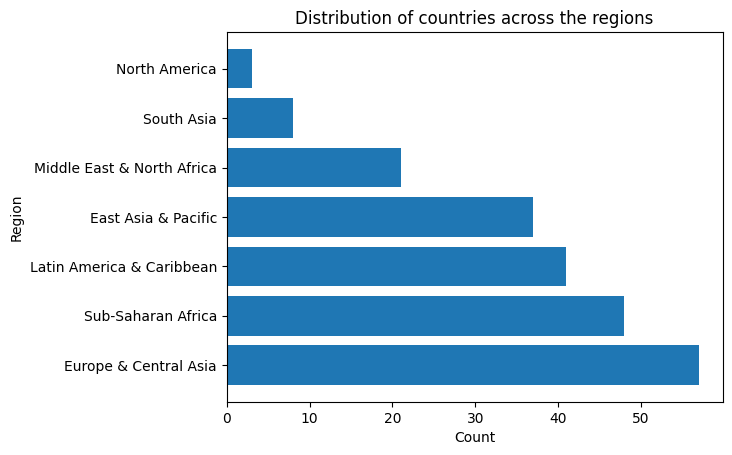

In [4]:
# Vẽ barplot cho các Region

# TODO
region_counts = world_df['Region'].value_counts()

plt.barh(region_counts.index, region_counts.values)
plt.title('Distribution of countries across the regions')  # Title of the plot
plt.xlabel('Count')  
plt.ylabel('Region')  


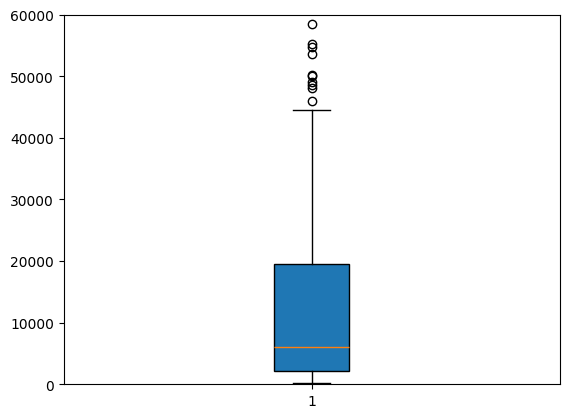

In [5]:
# Vẽ boxplot cho 'GNI per capita (USD)'

# TODO
gni_per_capita = world_df['GNI per capita (USD)']
plt.boxplot(gni_per_capita.dropna(), patch_artist=True) 
plt.ylim(0, 60000)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x211eef28760>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x211eef28700>,
 'cmins': <matplotlib.collections.LineCollection at 0x211eef28e80>,
 'cbars': <matplotlib.collections.LineCollection at 0x211eef41280>}

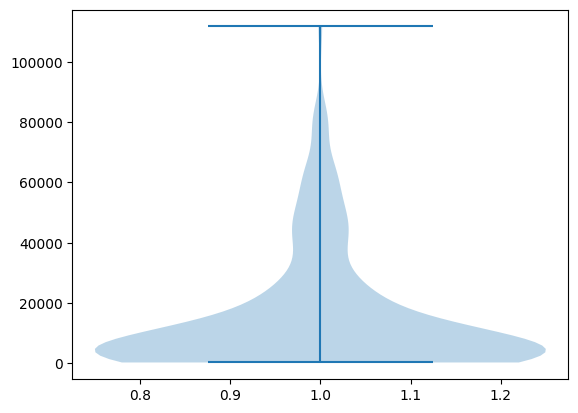

In [6]:
# Vẽ violinplot cho 'GNI per capita (USD)'

# TODO
plt.violinplot(gni_per_capita.dropna())

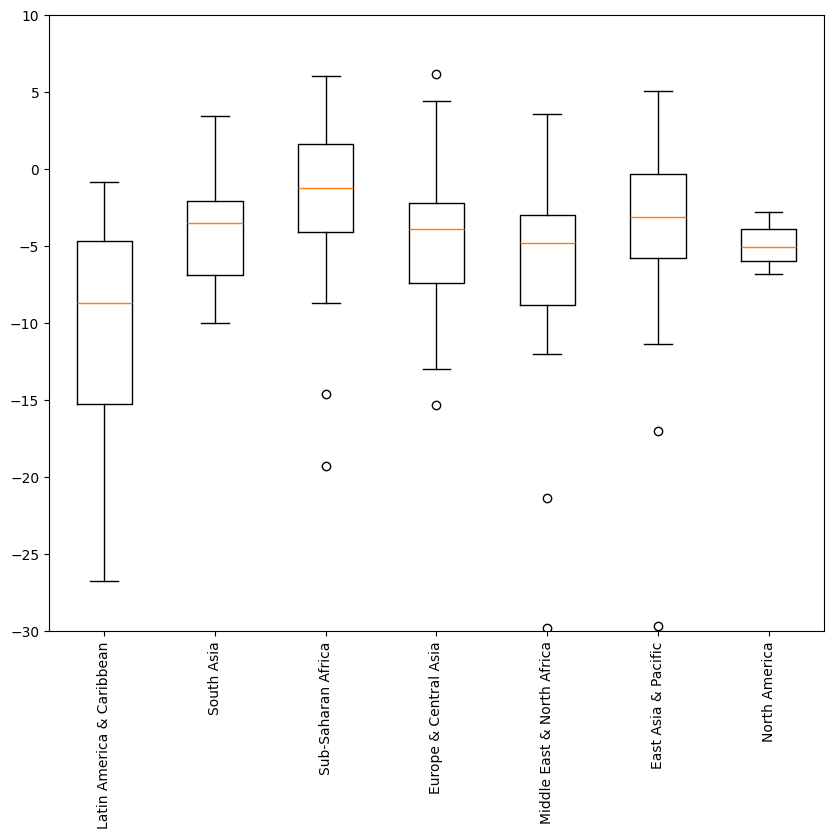

In [7]:
# Vẽ boxplot của 'GDP growth (annual %)' thuộc các Region lên cùng một biểu đồ

# TODO
# Filter out 'nan' from the regions to exclude it from the plot
regions = world_df['Region'].unique()
filtered_regions = [region for region in regions if str(region).lower() != 'nan']
filtered_gdp_growth = [world_df[world_df['Region'] == region]['GDP growth (annual %)'].dropna() for region in filtered_regions]

plt.figure(figsize=(10,8))
plt.boxplot(filtered_gdp_growth)
plt.xticks(ticks=range(1, len(filtered_regions)+1), labels=filtered_regions, rotation=90)
plt.ylim(-30, 10)
plt.show()

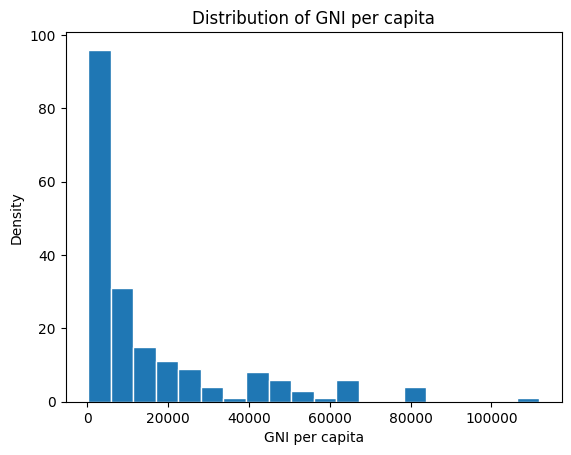

In [43]:
# Vẽ histogram của 'GNI per capita (USD)'

# TODO
hist = plt.hist(world_df['GNI per capita (USD)'].dropna(), bins = 20,
                edgecolor = 'white')
plt.xlabel('GNI per capita')
plt.ylabel('Density')
plt.title('Distribution of GNI per capita')
plt.show()

Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

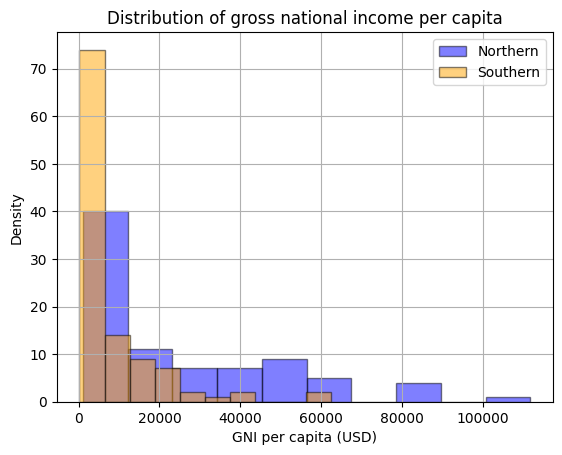

In [9]:
# Hãy vẽ 2 histogram thể hiện sự phân bố của cột 'GNI per capita (USD)'
# cho bán cầu bắc và bán cầu nam lên cùng một bản đồ

# TODO
# Phân loại các vùng thành bán cầu bắc và bán cầu nam
northern_regions = ['Europe & Central Asia', 'North America', 'East Asia & Pacific']
southern_regions = ['Sub-Saharan Africa', 'Middle East & North Africa', 'South Asia', 'Latin America & Caribbean']

# Tạo hai DataFrame cho bán cầu bắc và bán cầu nam
northern_df = world_df[world_df['Region'].isin(northern_regions)]
southern_df = world_df[world_df['Region'].isin(southern_regions)]

plt.hist(northern_df['GNI per capita (USD)'].dropna(), bins=10, color='blue', alpha=0.5, label='Northern', density=False, edgecolor='black')
plt.hist(southern_df['GNI per capita (USD)'].dropna(), bins=10, color='orange', alpha=0.5, label='Southern', density=False, edgecolor='black')
plt.title('Distribution of gross national income per capita')
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

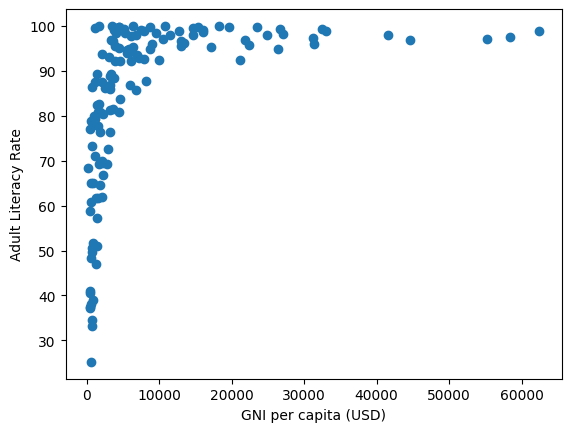

In [10]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'

# TODO
# gni_per_capita = world_df['GNI per capita (USD)']
# adult_literacy_rate = world_df['Adult literacy rate']
filtered_world_df = world_df.dropna(subset=['GNI per capita (USD)', 'Adult literacy rate'])

gni_per_capita = filtered_world_df['GNI per capita (USD)']
adult_literacy_rate = filtered_world_df['Adult literacy rate']

plt.scatter(gni_per_capita, adult_literacy_rate)
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult Literacy Rate')
plt.show()

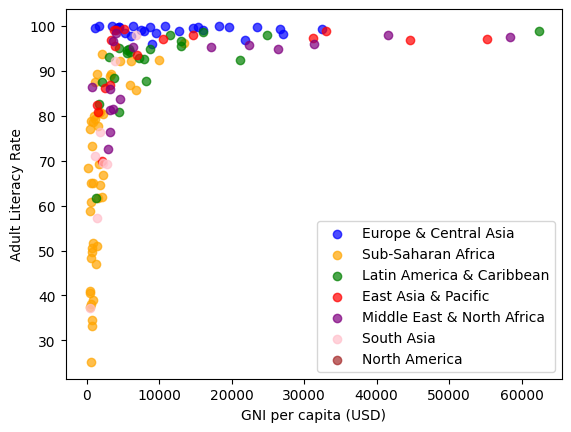

In [11]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# cho mỗi Region với màu khác nhau
# TODO
color_scheme = {
    'Europe & Central Asia': 'blue',
    'Sub-Saharan Africa': 'orange',
    'Latin America & Caribbean': 'green',
    'East Asia & Pacific': 'red',
    'Middle East & North Africa': 'purple',
    'South Asia': 'pink',
    'North America': 'brown'
}

for region, color in color_scheme.items():
    region_df = filtered_world_df[filtered_world_df['Region'] == region]
    plt.scatter(region_df['GNI per capita (USD)'], region_df['Adult literacy rate'], color=color, label=region, alpha=0.7)

# Adding labels and title.
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult Literacy Rate')
plt.legend()
plt.show()

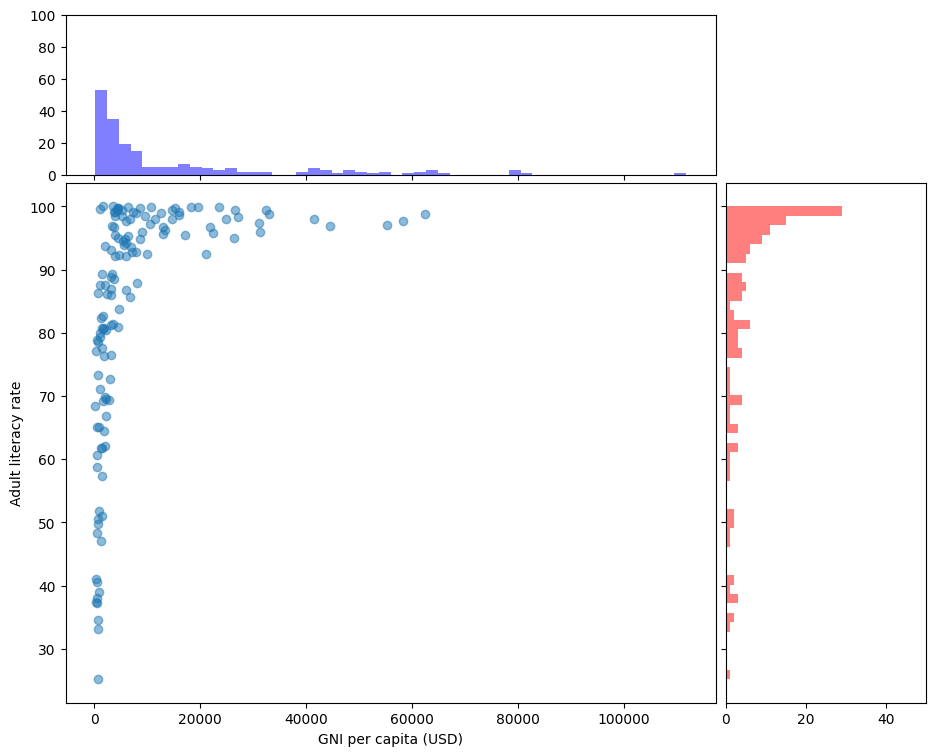

In [37]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục

# TODO
# Scatter plot and histograms
fig = plt.figure(figsize=(10, 8))

# Define the scatter plot and histograms
scatter_ax = fig.add_axes([0.1, 0.1, 0.65, 0.65])
x_hist_ax = fig.add_axes([0.1, 0.76, 0.65, 0.2], sharex=scatter_ax)
y_hist_ax = fig.add_axes([0.76, 0.1, 0.2, 0.65], sharey=scatter_ax)

# Hide hist ticks
x_hist_ax.tick_params(axis="x", labelbottom=False)
y_hist_ax.tick_params(axis="y", labelleft=False)

# Scatter plot
scatter_ax.scatter(world_df['GNI per capita (USD)'], world_df['Adult literacy rate'], alpha=0.5)

# Histogram for the x-axis variable
x_hist_ax.hist(world_df['GNI per capita (USD)'].dropna(), bins=50, alpha=0.5, color='blue')

# Histogram for the y-axis variable
y_hist_ax.hist(world_df['Adult literacy rate'].dropna(), bins=50, orientation='horizontal', alpha=0.5, color='red')

# Set labels
scatter_ax.set_xlabel('GNI per capita (USD)')
scatter_ax.set_ylabel('Adult literacy rate')

# Set limits for the histograms to match the user's example
x_hist_ax.set_ylim(0, 100)
y_hist_ax.set_xlim(0, 50)

plt.show()